<a href="https://colab.research.google.com/github/siddarthpaim/AzureHack/blob/master/Siddarth_Pai_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5

**OPIM 5641: Business Decision Modeling - University of Connecticut**

**Due Friday, May 20, 7:59am**

*Please add detailed comments to all code so that I can follow your solution. If I cannot understand your code then you will not receive full credit.*

-------------------------------------------------------------------------
* Your Name Here : Siddarth Pai
* Your NetID Here : sip21003


# Problem 1

Part A: Taking the Pharmacy data example, build an optimization model to find the best fit power model, i.e., using $f(x) = a \cdot x^b$. (Note: we already completed this in class)

Part B: Suppose it costs $\$85$ per hour to keep the pharmacy operating.  What is the optimal number of hours that you should keep the pharmacy open based on the model from Part A?


 **Part A Solution:**

Import Pyomo Module

In [1]:

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("ipopt") or os.path.isfile("ipopt")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        #!apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

     |████████████████████████████████| 9.6 MB 6.8 MB/s 
     |████████████████████████████████| 49 kB 1.9 MB/s 


In [2]:
# Additional packages
import numpy as np
from scipy import stats

In [3]:
hours = [
  40,
  44,
  48,
  48,
  60,
  70,
  72,
  90,
  100,
  168
]
revenue = [
  5958,
  6662,
  6004,
  6011,
  7250,
  8632,
  6964,
  11097,
  9107,
  11498
]
hours = np.array(hours)
revenue = np.array(revenue)
n_points = len(hours)

In [8]:
b,a,r_value,p_value,s_err = stats.linregress(hours,revenue)

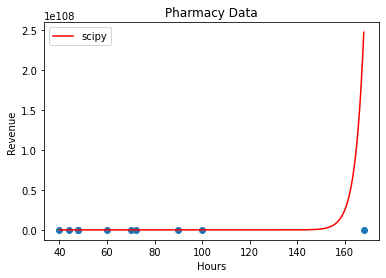

In [11]:
x = np.linspace(np.min(hours),np.max(hours),1000)
y = a*x**b
scatter(hours,revenue)
plot(x,y,color='r')
xlabel("Hours")
ylabel("Revenue")
title("Pharmacy Data")
legend(["scipy"])

In [24]:
model_powerset = ConcreteModel()

model_powerset.a = Var(domain = Reals)
model_powerset.b = Var(domain = Reals)

error_expr = 0

for i in range(n_points):
  error_expr += (revenue[i] - ( model_powerset.a * hours[i]**model_powerset.b ))**2

model_powerset.mse = Objective(
    expr = error_expr,
    sense = minimize
)

In [25]:
model_powerset.pprint()

2 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    mse : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (5958 - a*40**b)**2 + (6662 - a*44**b)**2 + (6004 - a*48**b)**2 + (6011 - a*48**b)**2 + (7250 - a*60**b)**2 + (8632 - a*70**b)**2 + (6964 - a*72**b)**2 + (11097 - a*90**b)**2 + (9107 - a*100**b)**2 + (11498 - a*168**b)**2

3 Declarations: a b mse


In [26]:
opt = SolverFactory('ipopt',executable="/content/ipopt")
opt_success = opt.solve(model_powerset,tee=True)

Ipopt 3.12.13: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Tot

In [27]:
print("Coefficients: ", round(value(model_powerset.a),2) , "\t", round(value(model_powerset.b),2) )

Coefficients:  1022.03 	 0.48


In [28]:

y_powerset = value(model_powerset.a) * x**value(model_powerset.b)


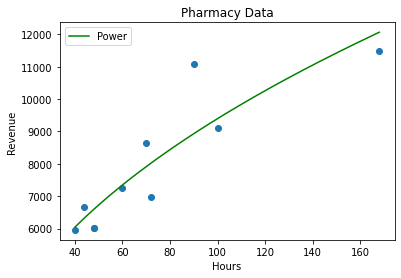

In [31]:
scatter(hours,revenue)
plot(x,y_powerset,color='green')
xlabel("Hours")
ylabel("Revenue")
title("Pharmacy Data")
legend(["Power"])

# Problem 2

Answer part 1(a) in the project. Each individual must turn in the solution. The answer must be based on reading the data into python and finding the answer by using the matrix that we built.  Please answer the problem for both the small network and the large network. 